In [58]:
import pandas as pd
import numpy as np

In [59]:
ls

176-01-bikelocations.csv
176-01-ind_dublinalt.csv
176-01-ind_dublinalt.csv.gz
176-01-sum_dublinalt.csv
2008 machine learning start.ipynb
2018-06-20.csv
2018-06-20.ipynb
2018-06-20_features.csv
PORTOBELLO ROAD.csv
all-station-features-march_on.ipynb
all-station-features-march_on.py
all-station-features.ipynb
bikes_2018.csv
f_features.csv
features2.csv
features_ready.csv
fulldata-spoken.ipynb
knn for neil.ipynb
machinestarts-2years_all stations.ipynb
machinestarts.ipynb
machinestarts2.ipynb
pboh-features.ipynb
pboh.ipynb
scattered.ipynb
time_series_features.csv


In [60]:
df = pd.read_csv('2018-06-20_features.csv', parse_dates=True, index_col='timestamp')

In [61]:
df.head()

,Unnamed: 0,tfl_id,bikes,spaces,total_docks,deposit,deposit_lag,deposit_flag
timestamp,,,,,,,,
2018-06-20 00:00:03,16,1,0,31,31,NaN,NaN,0
2018-06-20 00:00:03,49,66,18,22,40,-3.0,21.0,0
2018-06-20 00:00:03,8,52,0,32,32,-29.0,29.0,0
2018-06-20 00:00:03,2,54,1,32,33,-16.0,17.0,0
2018-06-20 00:00:03,63,51,0,40,40,0.0,0.0,0


In [62]:
#df = df.drop('Unnamed: 0')

In [63]:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 681380 entries, 2018-06-20 00:00:03 to 2018-06-28 16:46:02
Data columns (total 8 columns):
Unnamed: 0      681380 non-null int64
tfl_id          681380 non-null int64
bikes           681380 non-null int64
spaces          681380 non-null int64
total_docks     681380 non-null int64
deposit         681379 non-null float64
deposit_lag     681379 non-null float64
deposit_flag    681380 non-null int64
dtypes: float64(2), int64(6)
memory usage: 46.8 MB


In [64]:
df.tail()

,Unnamed: 0,tfl_id,bikes,spaces,total_docks,deposit,deposit_lag,deposit_flag
timestamp,,,,,,,,
2018-06-28 16:46:02,681336,59,14,6,20,0.0,14.0,0
2018-06-28 16:46:02,681297,45,9,21,30,1.0,8.0,0
2018-06-28 16:46:02,681324,8,28,2,30,0.0,28.0,0
2018-06-28 16:46:02,681338,94,1,39,40,0.0,1.0,0
2018-06-28 16:46:02,681290,112,2,28,30,-1.0,3.0,0


In [65]:
df.describe()

,Unnamed: 0,tfl_id,bikes,spaces,total_docks,deposit,deposit_lag,deposit_flag
count,681380.000000,681380.000000,681380.000000,681380.000000,681380.000000,681379.000000,681379.000000,681380.000000
mean,340689.500000,56.012401,11.290064,20.390706,31.783990,0.000003,11.290078,0.000351
std,196697.607547,32.012389,11.456809,12.121049,7.506216,0.694706,11.456812,0.018725
min,0.000000,1.000000,0.000000,0.000000,16.000000,-32.000000,0.000000,0.000000
25%,170344.750000,29.000000,1.000000,11.000000,29.000000,0.000000,1.000000,0.000000
50%,340689.500000,56.000000,7.000000,20.000000,30.000000,0.000000,7.000000,0.000000
75%,511034.250000,83.000000,19.000000,30.000000,40.000000,0.000000,19.000000,0.000000
max,681379.000000,112.000000,40.000000,42.000000,40.000000,40.000000,40.000000,1.000000


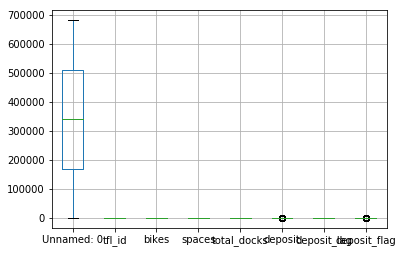

In [66]:
df.boxplot()

In [67]:
#df['deposit_lag'] = df.groupby(['tfl_id'])['bikes'].shift().fillna(0)

In [68]:
#df['deposit'] = df.groupby(['tfl_id'])['bikes'].diff().fillna(0)

In [72]:
df[df['deposit_flag']== '']

/Users/neil/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [89]:
df['deposit'].isnull().values.any()

False

In [92]:
df['deposit_lag'] = df['deposit_lag'].fillna(0)

In [93]:
df.isnull().values.any()

False

In [95]:
if df.isnull().values.any() == True:
    for column in df.columns:
        print(df[column].isnull().values.any())
        print(column)
else:
    print("There are no null values")

There are no null values


In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()

In [98]:
df.head(2)

,Unnamed: 0,tfl_id,bikes,spaces,total_docks,deposit,deposit_lag,deposit_flag
timestamp,,,,,,,,
2018-06-20 00:00:03,16,1,0,31,31,0.0,0.0,0
2018-06-20 00:00:03,49,66,18,22,40,-3.0,21.0,0


In [99]:
scaler.fit(df.drop('deposit_flag', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [100]:
scaled_features = scaler.transform(df.drop('deposit_flag', axis=1))

In [101]:
scaled_features


array([[-1.73196692e+00, -1.71847351e+00, -9.85446522e-01, ...,
        -1.04445485e-01, -4.22513260e-06, -9.85446039e-01],
       [-1.73179915e+00,  3.11991903e-01,  5.85672734e-01, ...,
         1.09456159e+00, -4.31838551e+00,  8.47526004e-01],
       [-1.73200759e+00, -1.25339109e-01, -9.85446522e-01, ...,
         2.87775227e-02, -4.17443566e+01,  1.54580107e+00],
       ...,
       [ 1.73176865e+00, -1.49980800e+00,  1.45851676e+00, ...,
        -2.37668493e-01, -4.22513260e-06,  1.45851669e+00],
       [ 1.73183982e+00,  1.18665393e+00, -8.98162118e-01, ...,
         1.09456159e+00, -4.22513260e-06, -8.98161656e-01],
       [ 1.73159579e+00,  1.74893665e+00, -8.10877715e-01, ...,
        -2.37668493e-01, -1.43946465e+00, -7.23592890e-01]])

In [102]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [103]:
df_feat.head()

,Unnamed: 0,tfl_id,bikes,spaces,total_docks,deposit,deposit_lag
0,-1.731967,-1.718474,-0.985447,0.875279,-0.104445,-0.000004,-0.985446
1,-1.731799,0.311992,0.585673,0.132769,1.094562,-4.318386,0.847526
2,-1.732008,-0.125339,-0.985447,0.957780,0.028778,-41.744357,1.545801
3,-1.732038,-0.062863,-0.898162,0.957780,0.162001,-23.031371,0.498388
4,-1.731728,-0.156577,-0.985447,1.617790,1.094562,-0.000004,-0.985446


In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X = df_feat
y = df['deposit_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn = KNeighborsClassifier(n_neighbors=3)

In [108]:
#need a majority to be able to classify

In [109]:
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [110]:
pred = knn.predict(X_test)

In [111]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [112]:
from sklearn.metrics import classification_report, confusion_matrix

In [113]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[204345      0]
 [     3     66]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    204345
          1       1.00      0.96      0.98        69

avg / total       1.00      1.00      1.00    204414



In [37]:
error_rate = []

# Will take some time
for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

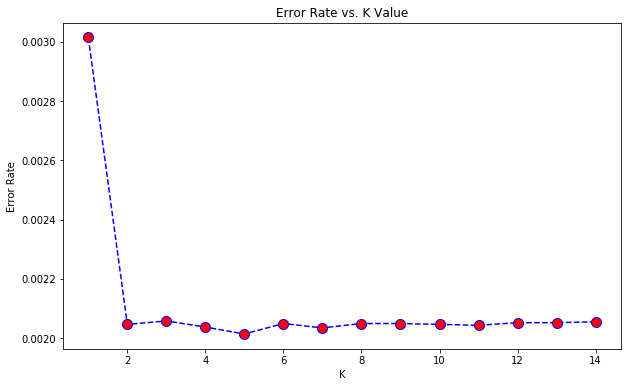

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

from sklearn.tree import DecisionTreeClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski', p = 2)

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [41]:
pred = knn.predict(X_test)

In [42]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[340323     30]
 [   672     25]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    340353
          1       0.45      0.04      0.07       697

avg / total       1.00      1.00      1.00    341050



In [ ]:

X = df_feat
y = df['deposit_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
    

In [ ]:
knn.fit(X_train, y_train)


In [ ]:
pred = knn.predict(X_test)

In [ ]:
pred


# print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 5

# import some data to play with
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AAAABB', '#AAAACC'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#0000BB', '#0000CC'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

TypeError: unhashable type: 'slice'

In [147]:
#for non scaled features
X = df.drop('deposit_flag')
y = df['deposit_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
y_test[y_test == 0].count()

204334

In [144]:
y_train[y_train == 1].count()

159

In [146]:
X_test.count()

Unnamed: 0     204414
tfl_id         204414
bikes          204414
spaces         204414
total_docks    204414
deposit        204414
deposit_lag    204414
dtype: int64

In [153]:
X = df.drop('deposit_flag', axis=1)

In [154]:
y = df['deposit_flag']

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [148]:
dtree = DecisionTreeClassifier()

In [157]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [158]:
X_test

,Unnamed: 0,tfl_id,bikes,spaces,total_docks,deposit,deposit_lag
timestamp,,,,,,,
2018-06-23 07:50:03,260703,51,11,29,40,0.0,11.0
2018-06-20 23:18:02,75804,63,2,33,35,0.0,2.0
2018-06-22 11:20:03,193650,102,0,40,40,0.0,0.0
2018-06-20 20:44:03,67416,55,0,36,36,0.0,0.0
2018-06-23 15:22:02,284357,37,6,24,30,0.0,6.0
2018-06-20 11:42:02,37912,56,26,14,40,0.0,26.0
2018-06-22 00:18:02,157625,40,0,21,21,0.0,0.0
2018-06-25 08:32:02,418950,19,15,15,30,-2.0,17.0
2018-06-25 03:08:01,401257,32,20,10,30,0.0,20.0


In [159]:
predictions = dtree.predict(X_test)

In [161]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[204345      0]
 [     0     69]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    204345
          1       1.00      1.00      1.00        69

avg / total       1.00      1.00      1.00    204414



In [164]:
print(predictions)

[0 0 0 ... 0 0 0]


In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [125]:
rfc = RandomForestClassifier(n_estimators=200)


In [126]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [127]:
rfc_pred = rfc.predict(X_test)

In [129]:
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[204334      0]
 [     0     80]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    204334
          1       1.00      1.00      1.00        80

avg / total       1.00      1.00      1.00    204414



In [130]:
mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)

In [131]:
mdl.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [132]:
mdl_pred = mdl.predict(X_test)

In [133]:
#print(confusion_matrix(y_test, mdl_pred))
#print(classification_report(y_test, mdl_pred))
print(mdl.feature_importances_)

[0. 0. 0. 0. 0. 1. 0.]


In [134]:
errors = abs(mdl_pred - y_test)

In [135]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.0 degrees.


In [136]:
print(mdl.predict(mdl_pred))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [ ]:
clf2 = KNeighborsClassifier(n_neighbors=7)
clf2.fit(X, y)

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
n_neighbors = 15


for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [ ]:

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
df.columns

In [ ]:
y_pred = knn.fit(X_train, y_train).predict(X_test)
class_names = df.columns

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid = {"n_estimators": [200, 500],
    "max_depth": [3, None],
    "max_features": [1, 3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True, False]}

In [105]:
model = RandomForestRegressor(random_state=42)
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [114]:
model.score


<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)>

In [113]:
model.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [123]:
accuracy = accuracy_score(y_test, pred)

In [122]:
from sklearn.metrics import accuracy_score

In [124]:
print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.998


In [ ]:
regressor = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=None, max_features=3, 
                                  min_samples_leaf=1, min_samples_split=2, bootstrap=False)


In [ ]:
regressor.fit(X_train, y_train)

In [ ]:
regressor.score(X_test, y_test)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
plt.scatter(x=y_test, y=y_pred)

In [ ]:
plt.show()

In [ ]:
import seaborn as sns

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);

In [165]:
from sklearn import svm

In [166]:
clf = svm.SVC(gamma=0.001, C=100.)

In [167]:
clf.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [170]:
list(clf.predict(X_test))==1

False

In [173]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [172]:
from sklearn.linear_model import LogisticRegression

In [174]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
=